# 6.6.3 Neighborhood Components Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from scipy.special import logsumexp
from sklearn.datasets import make_classification
from sklearn.neighbors import NeighborhoodComponentsAnalysis

import warnings
warnings.filterwarnings("ignore")

link: https://www.youtube.com/watch?v=p171TcXgyOg&feature=youtu.be

links: https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_illustration.html

Este transformador realiza una transformación óptima del dataset de entrenamiento, tal que maximiza la probabilidad $p_i$ de que una muestra sea corectamente clasificada:

$$ arg \ max_L \sum_{i}^{} p_i $$

donde

$$ p_i = \sum_{j \epsilon C_i}^{} p_{ij} $$

$C_i$ es el conjunto de puntos que pertenencen a la misma clase del punto $i$, y $p_{ij}$  es la función softmax:

$$p_{ij} = \frac{\exp(−||L(x_i−x_j)||)^2}{ \sum_{k \neq i}^{} \exp(−||L(x_i−x_k)||^2)} $$

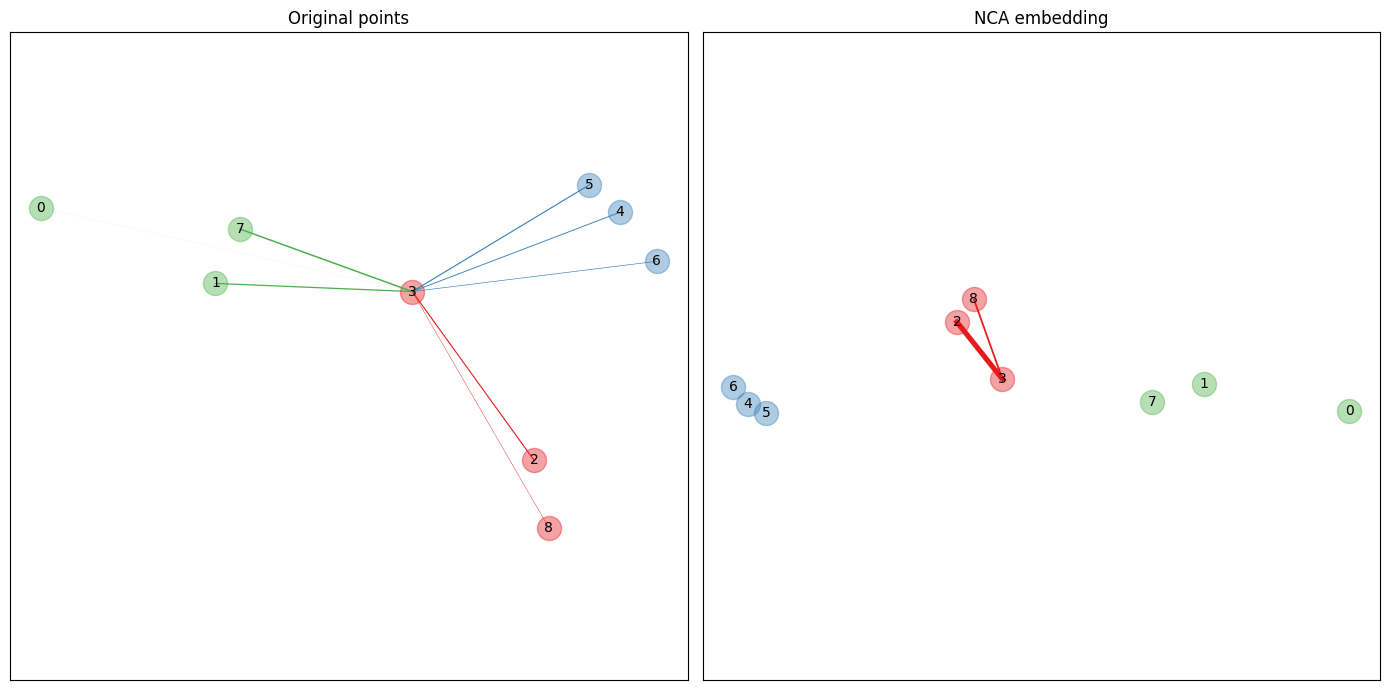

In [3]:
X, y = make_classification(
    n_samples=9,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1.0,
    random_state=0,
)


plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)

ax = plt.gca()
for i in range(X.shape[0]):
    plt.gca().text(X[i, 0], X[i, 1], str(i), va="center", ha="center")
    plt.gca().scatter(X[i, 0], X[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

plt.gca().set_title("Original points")
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axis("equal")  # so that boundaries are displayed correctly as circles


def link_thickness_i(X, i):
    diff_embedded = X[i] - X
    dist_embedded = np.einsum("ij,ij->i", diff_embedded, diff_embedded)
    dist_embedded[i] = np.inf
    exp_dist_embedded = np.exp(-dist_embedded - logsumexp(-dist_embedded))
    return exp_dist_embedded


def relate_point(X, i, ax):
    pt_i = X[i]
    for j, pt_j in enumerate(X):
        thickness = link_thickness_i(X, i)
        if i != j:
            line = ([pt_i[0], pt_j[0]], [pt_i[1], pt_j[1]])
            ax.plot(*line, c=cm.Set1(y[j]), linewidth=5 * thickness[j])


i = 3
relate_point(X, i, plt.gca())

plt.subplot(1, 2, 2)


nca = NeighborhoodComponentsAnalysis(
    max_iter=30,
    random_state=0,
)
nca = nca.fit(X, y)

X_embedded = nca.transform(X)
relate_point(X_embedded, i, plt.gca())

for i in range(len(X)):
    plt.gca().text(X_embedded[i, 0], X_embedded[i, 1], str(i), va="center", ha="center")
    plt.gca().scatter(
        X_embedded[i, 0], X_embedded[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4
    )

plt.gca().set_title("NCA embedding")
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axis("equal")

plt.tight_layout()
plt.show()

In [4]:
print('ok_')

ok_
